# 單元6 機器學習概要

機器學習其實基本上和我們一直以來說的一樣, 就是我們要學一個未知的函數

$$f(x) = y$$

如果是分類, 基本上就是有一筆資料 $x=(x_1, x_2, \ldots, x_k)$, 我們想知道這

$$f(x) = y$$,

其中的 $y$ 就是某一個類別。

這種學函數的方法, 又可以分為:

* supervised learning
* unsupervised learning 

其中的 supervised learning 就是我們有一組知道答案的訓練資料, 然後找到我們要的函數。而 unsupervised learning 就神了, 我們不知道答案, 卻要電腦自己去學!

今天我們就來介紹最最基本的方式, 一個是 SVM, 一個是 K-Means。

照例是讀入我們的標準套件。

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## 6-1 用 SVM 來做分類

#### 先做個簡單的資料

假設我們有四個點, 有兩個類別。

In [8]:
p = np.array([[1, 2], [2, 1], [1, 1], [2, 2]])
c = np.array([1, 2, 1, 2])

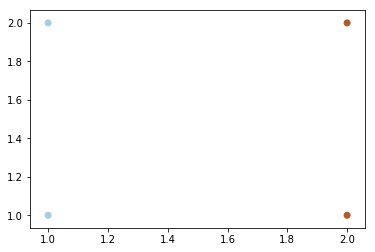

In [10]:
plt.scatter(p[:,0], p[:,1], c=c, cmap="Paired")

In [11]:
from sklearn.svm import SVC

In [16]:
clf = SVC(gamma='auto')

In [17]:
clf.fit(p, c)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
Ypred = clf.predict(p)

In [20]:
Ypred

array([1, 2, 1, 2])

In [22]:
c

array([1, 2, 1, 2])

In [24]:
clf.predict([[0,0]])

array([1])

In [25]:
clf.predict([[1.5, 1.5], [0, 0]])

array([2, 1])

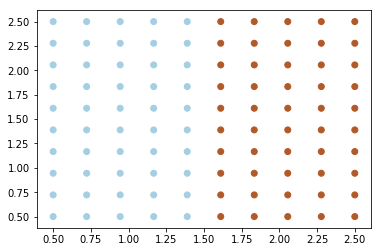

In [27]:
x = np.linspace(0.5, 2.5, 10)
y = np.linspace(0.5, 2.5, 10)
X, Y = np.meshgrid(x, y)
P = np.c_[X.ravel(), Y.ravel()]
C = clf.predict(P)
plt.scatter(P[:,0], P[:,1], c=C, cmap='Paired')

In [28]:
x_train = p
y_train = c

In [31]:
y_train

array([1, 2, 1, 2])

In [32]:
x = y = np.arange(0.5, 2.5, 0.02)

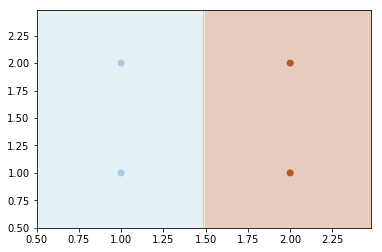

In [40]:
X, Y = np.meshgrid(x, y)
P = np.c_[X.ravel(), Y.ravel()]
z = clf.predict(P)
Z = z.reshape(X.shape)
plt.contourf(X, Y, Z, alpha=0.3, cmap='Paired')
plt.scatter(p[:,0], p[:,1], c=c, cmap='Paired')

## iris

In [41]:
from sklearn.datasets import load_iris

In [42]:
iris = load_iris()

In [46]:
x = iris.data
y = iris.target

In [53]:
X = x[:, :2]

In [54]:
Y = y

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                                   test_size=0.2,
                                                   random_state=0)

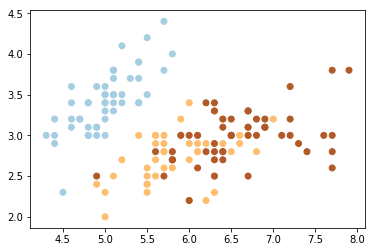

In [58]:
plt.scatter(X[:,0], X[:,1], c=Y, cmap='Paired')

In [61]:
clf = SVC(gamma="scale")

In [62]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [63]:
Ypred = clf.predict(x_test)

In [66]:
Ypred - y_test

array([-1,  0,  0,  0,  0,  0,  0,  1,  1,  0, -1,  1,  0,  1,  0,  0,  0,
        0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  1,  0,  0])

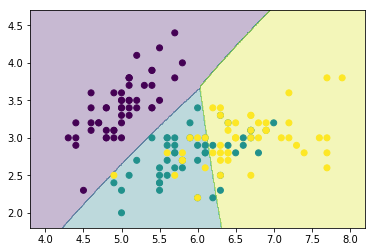

In [72]:
x0 = np.linspace(3.8, 8.2, 500)
y0 = np.linspace(1.8, 4.7, 500)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)

plt.scatter(X[:,0], X[:,1], c=Y)

## PCA

In [77]:
from sklearn.decomposition import PCA

In [78]:
pca = PCA(n_components=2)

In [79]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [81]:
X = pca.transform(x)

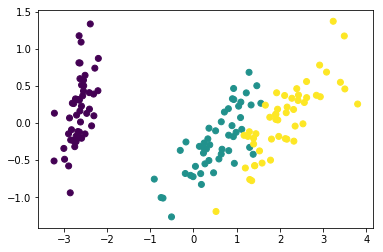

In [82]:
plt.scatter(X[:,0], X[:,1], c=y)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [86]:
clf = SVC(gamma='scale')

In [87]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

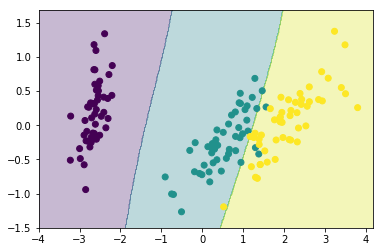

In [91]:
x0 = np.arange(-4, 4.2, 0.02)
y0 = np.arange(-1.5, 1.7, 0.02)

xm, ym = np.meshgrid(x0, y0)
P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)

In [92]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [93]:
y[87]

1

In [94]:
pca.transform([[6.3, 2.3, 4.4, 1.3]])

array([[ 0.81509524, -0.37203706]])

In [95]:
clf.predict([[ 0.81509524, -0.37203706]])

array([1])

In [34]:
X.shape

(100, 100)

In [36]:
Z.reshape(X.shape)

array([[1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       ...,
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2],
       [1, 1, 1, ..., 2, 2, 2]])

我們要畫圖時, 需要把 $x$ 中點的 $x$-座標, $y$-座標分成兩個 list (array)。記得我們要 $x$ 全部是這樣叫出來的。

#### 畫出已知分類狀態

而 $x$ 中前面的元素 ($x$-座標) 是這樣。當然 $y$-座標也是類似方法叫出來。

於是我們就能畫圖, `s=50` 是設定點的大小, `c=y` 就是指定顏色, 不同類別不同色。

#### 打開一台 SVM 分類機

支持向量機, 大家都用英文縮寫 SVM 稱呼。是一個用曲線把資料分隔的辦法。在高維度的時候自然就是曲面 (超曲面) 分隔資料的方法。

打開一台機器, 就像打開「迴歸機一樣」。

學習! 這樣就做完了!!

#### 預測結果

先來看看我們之前用來學的有沒有做對, 你會發現用法和以前迴歸是完全一樣的。

### 【技巧】視覺化成果之一

再來視覺化一下我們的成果, 這次我們用不太一樣的方式, 但技巧都學過了!

### 【技巧】視覺化成果之二

我們的「傳統手法」。

## 5-2 生個「像樣點」的假數據*

剛剛我們隨便做的數據又少、又不像真的。不如我們就來用 `sklearn` 生一些「像真的一樣」的數據。

#### 用 `make_classification` 製造分類數據

In [96]:
from sklearn.datasets import make_classification

開始你只需知道, `n_features` 是指 $x$ 的參數要幾個, `n_classes` 是你要分成幾類。

In [97]:
x, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, 
                           n_clusters_per_class=1, n_classes=3,
                           random_state=0)

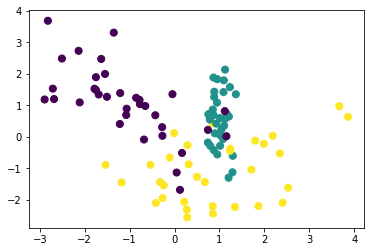

In [98]:
plt.scatter(x[:,0], x[:,1], s=50, c=y)

#### 訓練方式其實是一樣的!

In [99]:
clf = SVC()

In [100]:
clf.fit(x,y)

/Users/yenlung/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### 來看預測的結果

這裡看看我們可愛的 SVM, 把我們訓練資料學得怎麼樣。

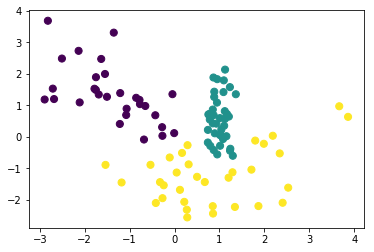

In [101]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x))

你有沒有看出哪個分錯了? 我是看不出來。所以我們用個簡單方式, 如果沒錯的會用一個顏色, 錯了就用其他顏色表示。

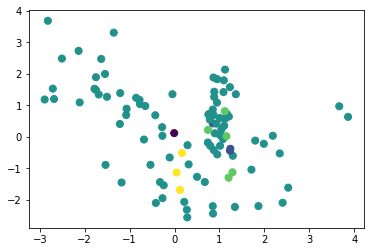

In [102]:
plt.scatter(x[:,0], x[:,1], s=50, c=clf.predict(x) - y)

當然再畫個我們最愛的...

In [103]:
x1, x2 = np.meshgrid(np.arange(-4,4,0.02), np.arange(-3,4,0.02))
X = np.c_[x1.ravel(),x2.ravel()]
Z = clf.predict(X)

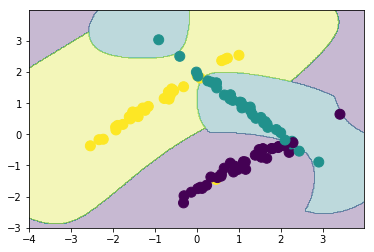

In [24]:
z = Z.reshape(x1.shape)

plt.contourf(x1, x2, z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], s=100, c=y)

## 5-3 來分分鳶尾花

鳶尾花 (Iris)  數據庫是很有名的資料, 就是試著以一朵鳶尾花花萼、花瓣的大小來分出是哪個的大小來分出是哪個亞種的鳶尾花。

#### 看數據庫的說明

一樣可以用

    print(iris.DESCR)
    
看數據庫說明。我們這裡看看 features 有哪些?

有四個 features: 花萼長度、寬度和花瓣長度、寬度

#### 準備 inputs 和 outputs

為了表示我們很神 (事實上只是好畫圖), 我們只用兩個 features  (花萼長度、寬度)。

用 80% 當訓練資料, 留 20% 看我們做得如何?

#### 畫圖出來感受一下

#### 開個分類機、訓練

#### 看看有沒有不準的?

#### 畫出結果

## 5-4 K-Means 會自動分類!

我們介紹一個很好用的 unsupervised learning, 叫 K-Means。我們可以指定把我們資料分成幾類, 然後它就會快速分好!

#### 隨便生個 100 點

In [142]:
x = np.random.rand(100,2)

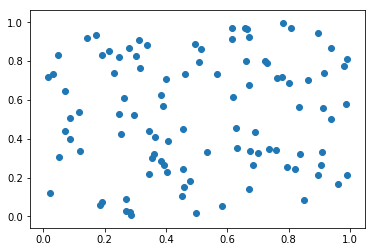

In [143]:
plt.scatter(x[:,0], x[:,1])

#### 製做一個 K-Means 分類器

和前面 SVM 很像。

In [107]:
from sklearn.cluster import KMeans

記得要告訴 K-Means 要分成幾類 (我們這裡是 3 類)。

In [108]:
clf = KMeans(n_clusters=3)

In [109]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [111]:
clf.labels_

array([0, 2, 1, 1, 2, 0, 2, 1, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 1,
       0, 1, 1, 0, 2, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1,
       1, 2, 0, 2, 1, 2, 2, 2, 2, 0, 1, 1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 1,
       2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 0, 1, 0, 0, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 2, 1, 2, 2, 0, 1, 2, 0, 2, 2, 2], dtype=int32)

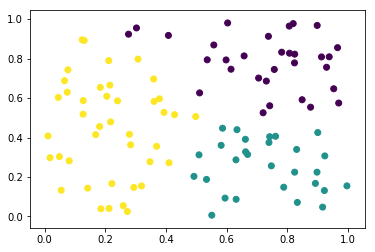

In [112]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

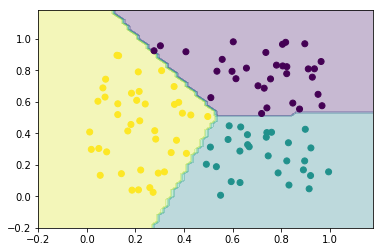

In [115]:
x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

### Mean Shift

In [116]:
from sklearn.cluster import MeanShift

In [144]:
clf = MeanShift(bandwidth=0.2)

In [145]:
clf.fit(x)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

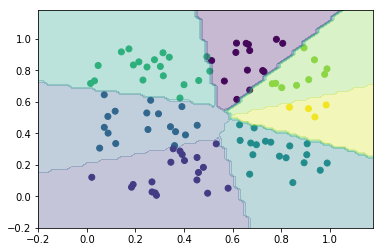

In [148]:
plt.scatter(x[:,0], x[:,1], c=clf.labels_)

x0 = y0 = np.arange(-0.2, 1.2, 0.02)
xm, ym = np.meshgrid(x0, y0)

P = np.c_[xm.ravel(), ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3)


In [150]:
def my_mean_shift(b=0.2):
    clf = MeanShift(bandwidth=b)
    clf.fit(x)
    
    plt.scatter(x[:,0], x[:,1], c=clf.labels_)

    x0 = y0 = np.arange(-0.2, 1.2, 0.02)
    xm, ym = np.meshgrid(x0, y0)

    P = np.c_[xm.ravel(), ym.ravel()]
    z = clf.predict(P)
    Z = z.reshape(xm.shape)
    plt.contourf(xm, ym, Z, alpha=0.3)
    

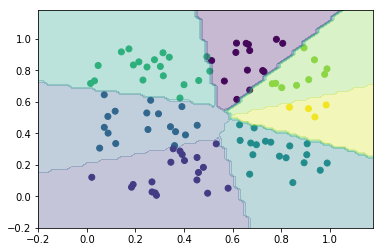

In [151]:
my_mean_shift(0.2)

In [152]:
from ipywidgets import interact

In [154]:
interact(my_mean_shift, b=(0.2, 1, 0.02))

interactive(children=(FloatSlider(value=0.2, description='b', max=1.0, min=0.2, step=0.02), Output()), _dom_cl…

<function __main__.my_mean_shift(b=0.2)>

#### 訓練好的結果

訓練好的結果, 在神秘的 `labels_` 之下。

#### 畫完整分類

和以前一樣, 未來新的資料進來, 我們訓練好的也可以再做分類。